## Create a List of Dictionaries from TSV

In [ ]:
# Simple Way to Read TSV Files in Python using pandas
# importing pandas library
import pandas as pd

# Passing the TSV file to
# read_csv() function
# with tab separator
# This function will
# read data from file hbh
PATH = 'AUTEXTICATION/subtask_1/en/train.tsv'
interviews_df = pd.read_csv(PATH, sep='\t')

# printing data
print(interviews_df)



In [ ]:
# Simple Way to Read TSV Files in Python using split

listdict = []

# open .tsv file
with open(PATH) as f:

    # Read data line by line
    for line in f:
        
        # split data by tab
        # store it in list
        l=line.split('\t')
        #i want to make a list of dictionaries dropping the id column an keeping only text and label
        l[2]=l[2].replace('\n','')
        listdict.append({'text':l[1],'label':l[2]})
        
# print data line by line
listdict = listdict[1:]
listdict



## Start exploring the data

In [41]:
#import counter to count occurences of certain words inside the text
from collections import Counter
#i want to count the occurences of the labels in my list of dictionaries
labels = [item['label'] for item in listdict]
Counter(labels)

Counter({'generated': 16799, 'human': 17046})

**the dataset is well class balanced as we can see**

In [42]:
import nltk

#i want to separate the text in sentences and then in words
sentences = [item['text'] for item in listdict]
words = [w for sentence in sentences for w in sentence.split()]
counts = nltk.Counter(words)
counts.most_common(20)

[('the', 99310),
 ('to', 56135),
 ('of', 53183),
 ('and', 36944),
 ('in', 33436),
 ('a', 33097),
 ('you', 22116),
 ('is', 19878),
 ('for', 18017),
 ('be', 17996),
 ('your', 17588),
 ('on', 16665),
 ('shall', 15894),
 ('The', 14688),
 ('that', 14378),
 ('Article', 13529),
 ('or', 13386),
 ('This', 12696),
 ('with', 12236),
 ('Regulation', 10962)]

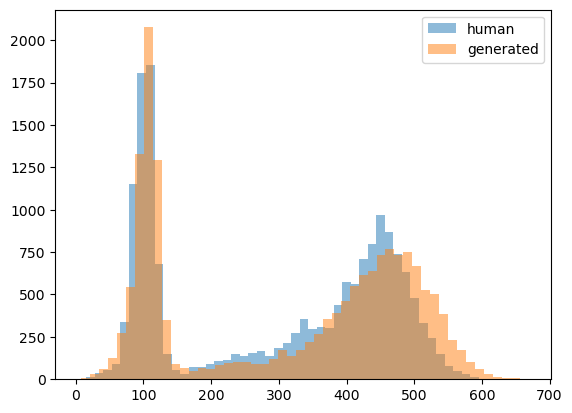

In [43]:
#separate sentences by label
humans = [item['text'] for item in listdict if item['label']=='human']
generateds = [item['text'] for item in listdict if item['label']=='generated']

#plot the lenght of sentences in each label
import matplotlib.pyplot as plt
plt.hist([len(human) for human in humans], 50, alpha=0.5, label='human')
plt.hist([len(generated) for generated in generateds], 50, alpha=0.5, label='generated')
plt.legend(loc='upper right')
plt.show()




In [44]:
average_len_human = sum([len(human) for human in humans]) / len(humans)
average_len_generated = sum([len(generated) for generated in generateds]) / len(generateds)
print(f'The average human sentence len is {average_len_human}, while generated is { average_len_generated}')
max_len_human = max([len(human) for human in humans])
max_len_generated = max([len(generated) for generated in generateds])
print(f'The max human sentence len is {max_len_human}, while generated is { max_len_generated}')
min_len_human = min([len(human) for human in humans])
min_len_generated = min([len(generated) for generated in generateds])
print(f'The min human sentence len is {min_len_human}, while generated is { min_len_generated}')


The average human sentence len is 297.1298251789276, while generated is 313.4907434966367
The max human sentence len is 633, while generated is 669
The min human sentence len is 3, while generated is 8


In [45]:
human_vocab = [set(w for w in human.split()) for human in humans]
generated_vocab = [set(w for w in generated.split()) for generated in generateds]

avg_human_vocab = sum([len(human) for human in human_vocab]) / len(human_vocab)
avg_generated_vocab = sum([len(generated) for generated in generated_vocab]) / len(generated_vocab)

print(f'The average human vocab len is {avg_human_vocab}, while generated is { avg_generated_vocab}')



The average human vocab len is 40.57010442332512, while generated is 42.30936365259837


qua sotto ho provato a fare la list comprehension in one liner

In [46]:
oneliner = [len(set(w for w in human.split()))for human in humans]

print(oneliner[:10])
avg_human = sum(oneliner) / len(oneliner)
print(f'The average human vocab len is {oneliner}')

[18, 41, 63, 59, 61, 20, 54, 15, 65, 21]
The average human vocab len is [18, 41, 63, 59, 61, 20, 54, 15, 65, 21, 61, 15, 20, 58, 20, 51, 60, 65, 61, 27, 50, 29, 68, 18, 52, 48, 53, 19, 15, 62, 10, 48, 18, 44, 25, 43, 55, 55, 52, 63, 18, 69, 39, 33, 61, 27, 16, 19, 44, 54, 56, 56, 58, 19, 22, 24, 15, 18, 20, 61, 49, 54, 19, 68, 58, 66, 16, 48, 56, 18, 57, 62, 33, 16, 58, 12, 42, 62, 52, 65, 32, 45, 61, 48, 52, 12, 29, 55, 25, 40, 14, 19, 53, 48, 58, 62, 54, 38, 55, 67, 44, 55, 63, 16, 64, 20, 19, 20, 42, 53, 15, 42, 16, 51, 16, 19, 17, 19, 17, 40, 14, 19, 57, 20, 17, 62, 17, 60, 16, 37, 23, 58, 47, 19, 20, 60, 60, 43, 30, 60, 48, 51, 60, 17, 39, 58, 56, 21, 16, 72, 54, 60, 64, 61, 57, 49, 56, 12, 43, 54, 41, 51, 19, 13, 42, 63, 51, 18, 47, 19, 19, 17, 73, 6, 38, 49, 48, 64, 64, 51, 61, 67, 51, 14, 67, 17, 14, 59, 20, 15, 55, 59, 42, 16, 54, 64, 58, 49, 47, 40, 21, 60, 52, 46, 58, 52, 64, 59, 50, 18, 50, 45, 20, 61, 16, 18, 19, 54, 28, 60, 18, 53, 54, 56, 63, 16, 39, 42, 51, 17, 66, 50, 

**SUGGERIMENTO DEL PROF!! HO PROVATO A VEDRE GLI SPELLING ERRORS MA SEMBRA CHE IL MODELLO GNERATO NE ABBIA ALTRETTANTI**

In [47]:
import string   
import re
string.punctuation
#remove punctuation from human and generated sentences
regex = '['+string.punctuation+']'
humans = [re.sub(regex, '', human) for human in humans]
generateds = [re.sub(regex, '', generated) for generated in generateds]
#remove numbers from human and generated sentences
regex = '[0-9]'
humans = [re.sub(regex, '', human) for human in humans]
generateds = [re.sub(regex, '', generated) for generated in generateds]
#remove quotes and parentheses and brackets from human and generated sentences
regex = '[‘’“”…«»\(\)\[\]]'
humans = [re.sub(regex, '', human) for human in humans]
generateds = [re.sub(regex, '', generated) for generated in generateds]
#remove new line from human and generated sentences
regex = '[\n]'
humans = [re.sub(regex, '', human) for human in humans]
generateds = [re.sub(regex, '', generated) for generated in generateds]




In [48]:
## i want to see if and how many spelling grammar and punctuation errors are in both human and generated sentences
##import sys
##!conda install --yes --prefix {sys.prefix} pyspellchecker

In [84]:
from spellchecker import SpellChecker
spell = SpellChecker()
# find those words that may be misspelled  by human
misspelled_human = [spell.unknown(human.split()) for human in humans] 
misspelled_generated = [spell.unknown(generated.split()) for generated in generateds]
mispelled_human_words = [word for words in misspelled_human for word in words]
mispelled_generated_words = [word for words in misspelled_generated for word in words]

#remove empty sets from list misspelled human and list mispelled generated
mis_human = [word for word in misspelled_human if word != set()]
mis_generated = [word for word in misspelled_generated if word != set()]

mispelled_human_words = [word for word in mispelled_human_words if word != set()]
mispelled_generated_words = [word for word in mispelled_generated_words if word != set()]

mispelled_set_human = set(mispelled_human_words)
mispelled_set_generated = set(mispelled_generated_words)

Qua ora sto printando il numero di frasi che hanno errori di spelling sia per human che per generated

In [89]:
print(len(mis_human))
print(len(mis_generated))
print(f'the number of misspelled words in human sentences is {len(mispelled_set_human)} while the number of misspelled words in generated sentences is {len(mispelled_set_generated)}')

11845
10674
the number of misspelled words in human sentences is 12294 while the number of misspelled words in generated sentences is 9017


In [81]:
#print some examples of mispelled words by human and by generated
print(mispelled_human_words[50:100])
print(mispelled_generated_words[50:100])
print(generateds[50:100])



['talentall', 'hundredreasons', 'heatresistant', 'cl', 'augmentin', 'fourday', 'uti', 'trimethoprim', 'clavulanate', 'sulfamethoxazole', 'utis', 'carlislecullen', 'seantheo', 'suvks', 'nre', 'kegg', 'abovementioned', 'transhipment', 'd', 'summarised', 'stoneybaby', 'nerfs', 'goodluck', 'pinchweld', 'l', 'eaggf', 'warmernicermore', 'cds', 'anzrocks', 'x', 'falkand', 'softbodied', 'doesnt', 'pearshaped', 'ph', 'lmfao', 'ittttt', 'heyyy', 'bhahahahahahha', 'rachealstfu', '½', 'transhipment', 'abovementioned', 'vii', 'sn', 'volleying', 'carbohydratebased', 'bday', 'todays', 'l']
['mutatis', 'croatia', 'mutandis', 'youre', 'ff', 'dvd', 'lartist', 'bodyweight', 'antidumping', 'heatinsulating', 'subcategories', 'andor', 'f', 'pisseed', 'parabenfree', 'blowdry', 'sulfatefree', 'eec', 'derogation', 'gsp', 'derogation', 'interpretative', 'n', 'caselaw', 'flareups', 'insulinreleasing', 'gt', 'doesnt', 'jj', 'missoulas', '•', 'kiwichiwi', 'dutyfee', 'b', 'eec', 'dutyfree', 'secretarygeneral', 'dan

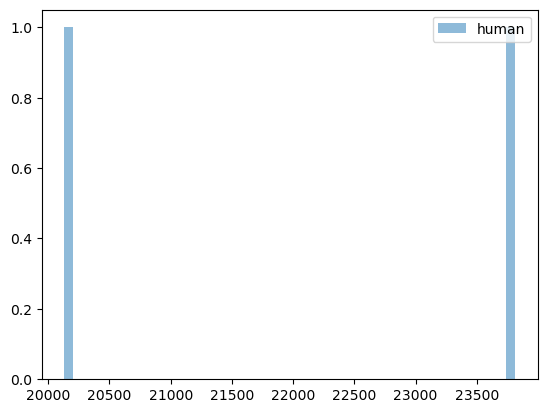

In [82]:
#plot number of generated sentences with misspelled words as opposoed to number of human sentences with misspelled words


In [72]:
human = generateds[0]
print(human.split())
print(type(spell.unknown(human.split())))

['you', 'need', 'to', 'stop', 'the', 'engine', 'and', 'wait', 'until', 'it', 'stops', 'This', 'is', 'how', 'I', 'would', 'do', 'it', 'Check', 'if', 'its', 'safe']
<class 'set'>


In [52]:
spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(['something', 'is', 'hapenning', 'here'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

happening
{'henning', 'penning', 'happening'}


## Considerations
After inspecting the lenght of the average human sentence vs the generated sentence lenght I found out that humans tend to produce shorter sentences...still don't know if this is relevant.

Also generated seems to use a richer vocabulary, but still this is probably a string assumption

## Simple Model Building

In [53]:
text = humans + generateds
sentences_y = ['human'] * len(humans) + ['generated'] * len(generateds)
#print(sentences_y)
print(len(sentences_y), len(humans), len(generateds))


33845 17046 16799


In [54]:
from sklearn.model_selection import train_test_split
trainx, testx, trainy, testy = train_test_split(text, sentences_y, test_size=0.2, random_state=42)

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0, lowercase=False, stop_words='english')
vectorizer.fit(trainx)
print(len(vectorizer.vocabulary_))
print(len(vectorizer.get_feature_names_out()))

46090
46090


In [56]:
train_x_vectors = vectorizer.transform(trainx)

## Model building

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(train_x_vectors, trainy)

/Users/luho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
#i want to see how many iterations my model did
model.n_iter_

array([100], dtype=int32)

In [59]:
my = 'today I had a beautiful day with my mother in Milan, she arrived and we had fun visitng the city, eating ice cream and taking a drink right before she took the train back to florence'
gpt = 'When my mother visited me in Milan, we spent the day exploring the historic city center, indulging in delicious Italian cuisine, and admiring the stunning architecture and art'
myn = 'what about flowers and bees?'
gptin = 'If I were a flower running wild and free, all I would want is for you to be my honeybee'


transformed_text = vectorizer.transform([my,gpt,myn,gptin])

predictions = model.predict(transformed_text)
print(predictions)

['human' 'generated' 'generated' 'human']


In [60]:
predicted_probabilities = model.predict_proba(transformed_text)
print(predicted_probabilities)

[[0.3903512  0.6096488 ]
 [0.7318283  0.2681717 ]
 [0.69487136 0.30512864]
 [0.46461029 0.53538971]]


In [61]:
test_x_vectors = vectorizer.transform(testx)
predy = model.predict(test_x_vectors)

In [62]:
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(predy, testy)}')

accuracy: 0.7594918008568474


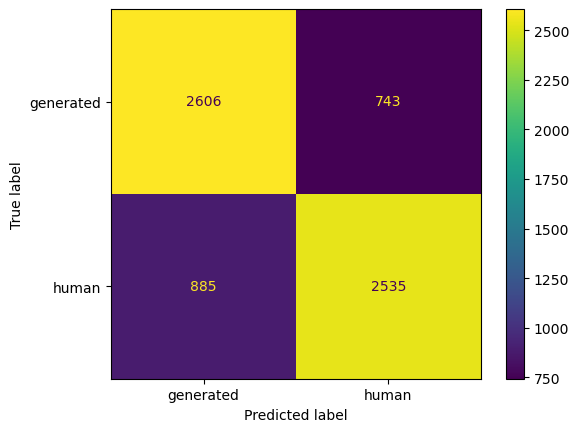

In [63]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(testy, predy, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [64]:
model.classes_

array(['generated', 'human'], dtype='<U9')